## Correlation Project

### Loading Necessary Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,9)

In [67]:
# Reading Our Data from File Directory
df=pd.read_csv(r"D:\Projects\movies.csv")

In [69]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [70]:
# checking for missing data
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [71]:
# Drop all NaN(s)
df.dropna(inplace=True)

In [72]:
# Check the Columns Data Types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
#Change Some Col dtypes
df["gross"] = df.gross.astype('int32')
df["budget"] = df.budget.astype('Int32')
df["votes"] = df.votes.astype('Int32')

In [74]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [75]:
# Creare a Correct Year column
df["correctyear"] = df["released"].astype(str).str.extract('(\d{4})')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\admin\AppData\Local\Temp\ipykernel_10152\1853298080.py:2: SyntaxWarning: invalid escape sequence '\d'
  df["correctyear"] = df["released"].astype(str).str.extract('(\d{4})')


In [76]:
df["gross"] = df["gross"].astype(float).abs()

In [88]:
df.sort_values(by='gross', inplace=True, ascending=False)

In [89]:
# Lets drop any duplicates
df.drop_duplicates()
df1=df.copy()
df1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.147484e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.147484e+09,Twentieth Century Fox,194.0,1997
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.147484e+09,Twentieth Century Fox,162.0,2009
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5.073000e+03,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2.970000e+03,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2.554000e+03,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2.270000e+03,Embassy Pictures,85.0,1982


### Hypotheis 1: Gross Earnings and Budget have a high correlation

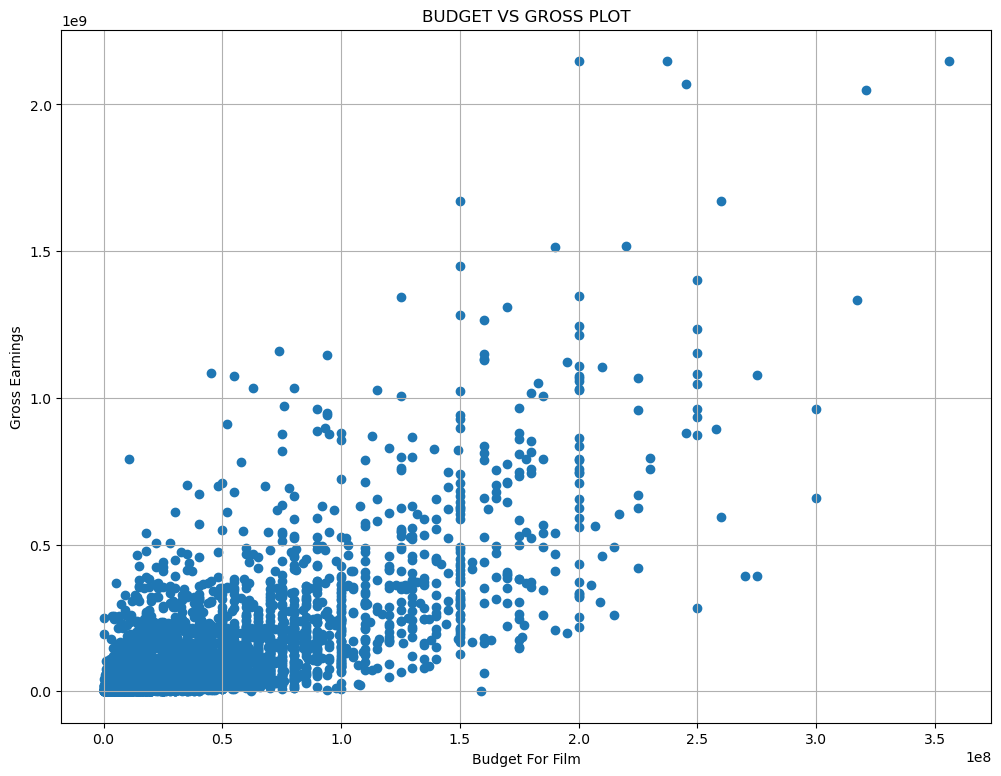

In [100]:
# Scatter plot to visualize budget vs gross
plt.scatter(x=df.budget, y=df.gross)
plt.title("BUDGET VS GROSS PLOT")
plt.ylabel('Gross Earnings')
plt.xlabel('Budget For Film')
plt.grid()
plt.show()

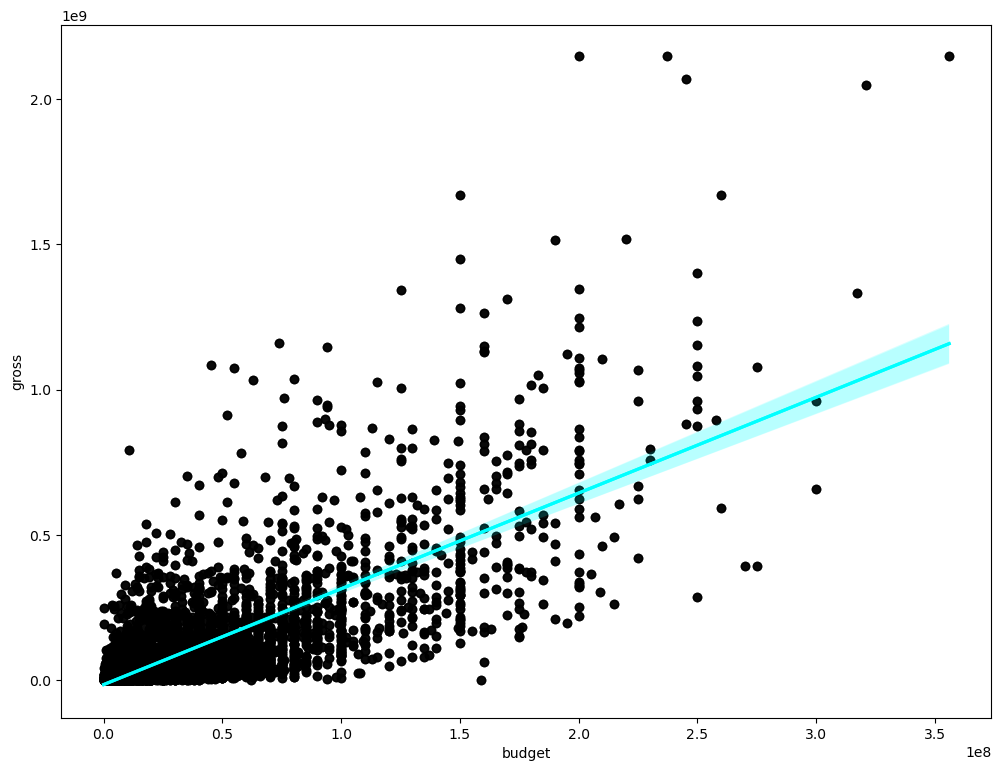

In [99]:
# PLot Budget vs Gross using seaborn
sns.regplot(x = 'budget', y='gross', data=df, scatter_kws={"color":"black"}, line_kws={"color":"cyan"})
plt.show()

### Let's look at the Correlation

In [ ]:
df.corr(numeric_only=True) # Methods include, Pearson(default), spearman, kendall

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.277715,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.224092,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.618978,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.744928,0.318695
gross,0.277715,0.224092,0.618978,0.744928,1.000000,0.275789
runtime,0.075077,0.414068,0.352303,0.318695,0.275789,1.000000


In [59]:
df.corr(numeric_only=True, method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [60]:
df.corr(numeric_only=True, method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


#### The above proves that our Hypothesis was correct, high Correlation between Gross and Budget exists.

### Correlation Matrix

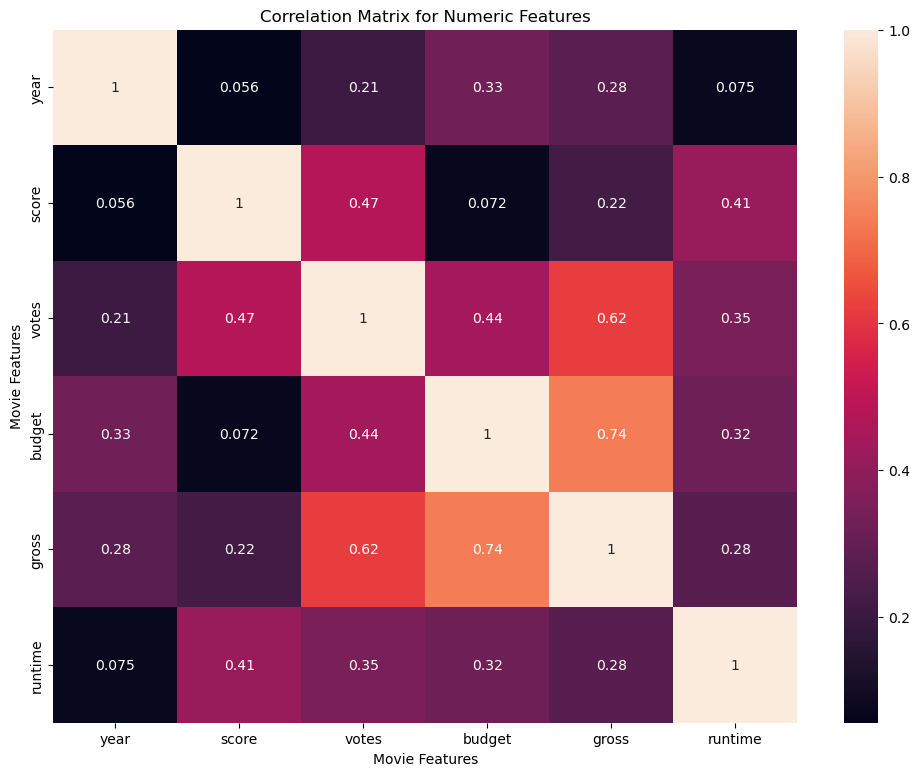

In [97]:
corr_mat=df.corr(numeric_only=True)
sns.heatmap(corr_mat, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()

### Hypothesis 2: Company and Gross have a High Correlation

In [91]:
# lets look as Company
df_numerized=df1
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category').cat.codes
df_numerized        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2.147484e+09,983,181.0,39
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2.147484e+09,1382,194.0,17
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2.147484e+09,1382,162.0,29
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2.069522e+09,945,138.0,35
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2.048360e+09,983,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5.073000e+03,1385,96.0,35
2434,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2.970000e+03,1376,97.0,14
3681,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2.554000e+03,466,108.0,21
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2.270000e+03,582,85.0,2


In [90]:
df1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.147484e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.147484e+09,Twentieth Century Fox,194.0,1997
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.147484e+09,Twentieth Century Fox,162.0,2009
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5.073000e+03,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2.970000e+03,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2.554000e+03,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2.270000e+03,Embassy Pictures,85.0,1982


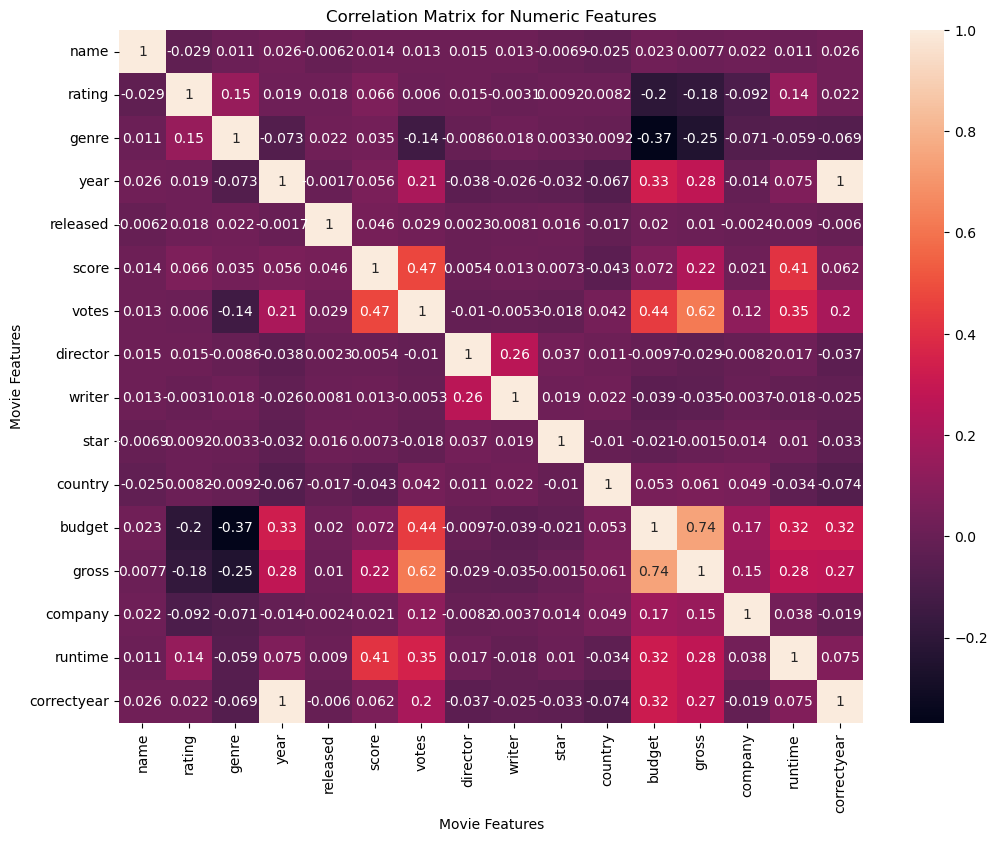

In [104]:
corr_mat=df_numerized.corr(numeric_only=True)
sns.heatmap(corr_mat, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()

In [109]:
corr_mat=df_numerized.corr()
corr_pairs=corr_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
                              ...   
correctyear  budget         0.320312
             gross          0.272036
             company       -0.018806
             runtime        0.075294
             correctyear    1.000000
Length: 256, dtype: float64

In [110]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.246831
genre        gross         -0.246831
rating       budget        -0.203946
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
Length: 256, dtype: float64

In [112]:
high_corr=sorted_pairs[sorted_pairs>=0.5]
high_corr

gross        votes          0.618978
votes        gross          0.618978
budget       gross          0.744928
gross        budget         0.744928
year         correctyear    0.998726
correctyear  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64

#### Company Has Low Correlation(Reject our Hypotheisi); Votes On the Hand proved to have a huge correlation as seen above